# ATP Tennis Data - Player History Diff Data (10 Matches)



### Results that did the best from Decision Tree Classifier with player diff + one hot encoded categorial features:


# Summary of Results


# Summary of Results




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, RSTATE, N_JOBS, MAX_ITER, LABEL_COL

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "diff-ohe-history10_diff"

# sometimes I run these notebooks via command line. Environment variable is set so we know whether we are in DEBUG mode or not
# if you want to manually run this in DEBUG mode, change default value to True
DEBUG = bool(os.environ.get("IPYNB_DEBUG", False))

if DEBUG:
    ModelWrapper.REPORT_FILE = '../reports/summary-test.csv'
    FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features_test-ohe-history10-matchup10-stats10.csv'
    DESCRIPTION = f"{DESCRIPTION}-test"
else:
    # update this
    FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-diff-ohe-history10-matchup10-stats10.csv'

START_YEAR = 1998
END_YEAR = 2018




In [2]:
import re

def filter_features(data: pd.DataFrame):
    print(f'Before: data.shape {data.shape} data.shape {data.shape}')
    
    matchup_columns = [col for col in data.columns if re.search('matchup', col)]
    data = data.drop(matchup_columns, axis=1)

    # drop all history columns that doesn't have percentage
    history_columns = [col for col in data.columns if re.search('history', col) and not re.search('diff', col)]
    data = data.drop(history_columns, axis=1)

    stats_columns = [col for col in data.columns if re.search("stats", col)]
    data = data.drop(stats_columns, axis=1)

    print(f'After: data.shape {data.shape} data.shape {data.shape}')
    
    return data

In [3]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR, data_filter = filter_features)

FileNotFoundError: [Errno 2] File b'../datasets/atp_matches_1985-2019_features-diff-ohe-history10-matchup10-stats10.csv' does not exist: b'../datasets/atp_matches_1985-2019_features-diff-ohe-history10-matchup10-stats10.csv'

Our dataset actually has both historical data as well as matchup data. We will remove the matchup columns from the dataset

In [4]:
[col for col in X_train.columns if re.search('history', col)]

NameError: name 'X_train' is not defined

# Logistic Regression

In [5]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test, data_filter = filter_features).fit()
y_predict_lr = lr.predict()

NameError: name 'X_train' is not defined

In [6]:
lr.analyze()

NameError: name 'lr' is not defined

In [7]:
# ju.plot_2d(X_test, y_predict_lr)

In [8]:
lr.save()

NameError: name 'lr' is not defined

# KNN

In [9]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test, data_filter = filter_features).fit()
y_predict_knn = knn.predict()

NameError: name 'X_train' is not defined

In [10]:
knn.analyze()

NameError: name 'knn' is not defined

In [11]:
# ju.plot_2d(X_test, y_predict_knn)

In [12]:
knn.save()

NameError: name 'knn' is not defined

# Decision Tree

In [13]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test, data_filter = filter_features).fit()
y_predict_dt = dt.predict()

NameError: name 'X_train' is not defined

In [14]:
dt.analyze()

NameError: name 'dt' is not defined

In [15]:
# ju.plot_2d(X_test, y_predict_dt)

In [16]:
dt.save()

NameError: name 'dt' is not defined

# Random Forest Classifier

In [17]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test, data_filter = filter_features).fit()
y_predict_rf = rf.predict()

NameError: name 'X_train' is not defined

In [18]:
rf.analyze()

NameError: name 'rf' is not defined

In [19]:
# ju.plot_2d(X_test, y_predict_rf)

In [20]:
rf.save()

NameError: name 'rf' is not defined

# Gradient Boosting

In [21]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test, data_filter = filter_features).fit()
y_predict_gb = gb.predict()

NameError: name 'X_train' is not defined

In [22]:
gb.analyze()

NameError: name 'gb' is not defined

In [23]:
# ju.plot_2d(X_test, y_predict_gb)

In [24]:
gb.save()

NameError: name 'gb' is not defined

# AdaBoost

In [25]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test, data_filter = filter_features).fit()
y_predict_ab = ab.predict()

NameError: name 'X_train' is not defined

In [26]:
ab.analyze()

NameError: name 'ab' is not defined

In [27]:
# ju.plot_2d(X_test, y_predict_ab)

In [28]:
ab.save()

NameError: name 'ab' is not defined

# Results

In [29]:
report = pd.read_csv(ModelWrapper.REPORT_FILE)
report.tail(6)

,accuracy,classification_report,confusion_matrix,data_file,data_filter_file,description,end_year,fit_time_min,model_file,model_name,predict_time_min,roc_auc_score,start_year,total_time_min
195,0.667387,"{""Loss"": {""precision"": 0.6729116777010846, ""re...","{""0"": {""0"": 4777, ""1"": 2322}, ""1"": {""0"": 2604,...",../datasets/atp_matches_1985-2019_features-ohe...,../models/adaboostclassifier-1998-2018-ohe-his...,ohe-history_percentage,2018,1.0,../models/adaboostclassifier-1998-2018-ohe-his...,AdaBoostClassifier,0.0,0.667322,1998,1.0
196,0.663268,"{""Loss"": {""precision"": 0.6621072589382448, ""re...","{""0"": {""0"": 4889, ""1"": 2495}, ""1"": {""0"": 2492,...",../datasets/atp_matches_1985-2019_features-ohe...,../models/logisticregression-1998-2018-ohe-his...,ohe-history_diff,2018,0.0,../models/logisticregression-1998-2018-ohe-his...,LogisticRegression,0.0,0.663265,1998,0.0
197,0.598717,"{""Loss"": {""precision"": 0.5968741579089194, ""re...","{""0"": {""0"": 4430, ""1"": 2992}, ""1"": {""0"": 2951,...",../datasets/atp_matches_1985-2019_features-ohe...,../models/decisiontreeclassifier-1998-2018-ohe...,ohe-history_diff,2018,0.0,../models/decisiontreeclassifier-1998-2018-ohe...,DecisionTreeClassifier,0.0,0.598722,1998,0.0
198,0.643754,"{""Loss"": {""precision"": 0.6251635152812463, ""re...","{""0"": {""0"": 5257, ""1"": 3152}, ""1"": {""0"": 2124,...",../datasets/atp_matches_1985-2019_features-ohe...,../models/randomforestclassifier-1998-2018-ohe...,ohe-history_diff,2018,0.0,../models/randomforestclassifier-1998-2018-ohe...,RandomForestClassifier,0.0,0.643975,1998,0.0
199,0.688859,"{""Loss"": {""precision"": 0.6912677610704925, ""re...","{""0"": {""0"": 5011, ""1"": 2238}, ""1"": {""0"": 2370,...",../datasets/atp_matches_1985-2019_features-ohe...,../models/gradientboostingclassifier-1998-2018...,ohe-history_diff,2018,11.0,../models/gradientboostingclassifier-1998-2018...,GradientBoostingClassifier,0.0,0.688827,1998,11.0
200,0.672384,"{""Loss"": {""precision"": 0.6750657621486916, ""re...","{""0"": {""0"": 4876, ""1"": 2347}, ""1"": {""0"": 2505,...",../datasets/atp_matches_1985-2019_features-ohe...,../models/adaboostclassifier-1998-2018-ohe-his...,ohe-history_diff,2018,1.0,../models/adaboostclassifier-1998-2018-ohe-his...,AdaBoostClassifier,0.0,0.672346,1998,1.0


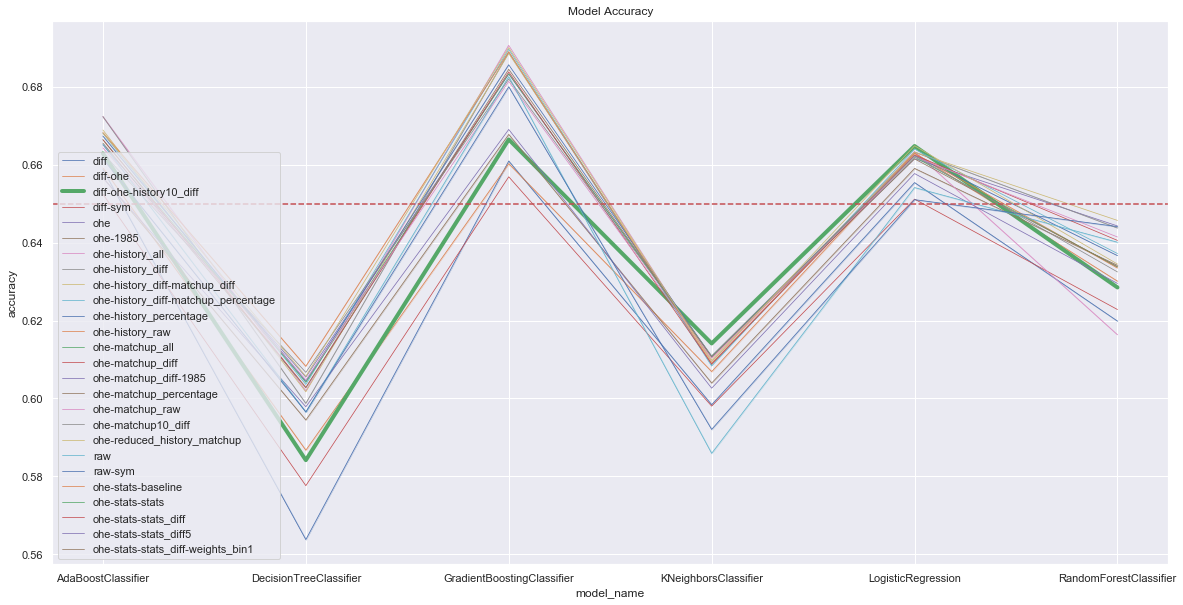

In [30]:
f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

Best Model: GradientBoostingClassifier


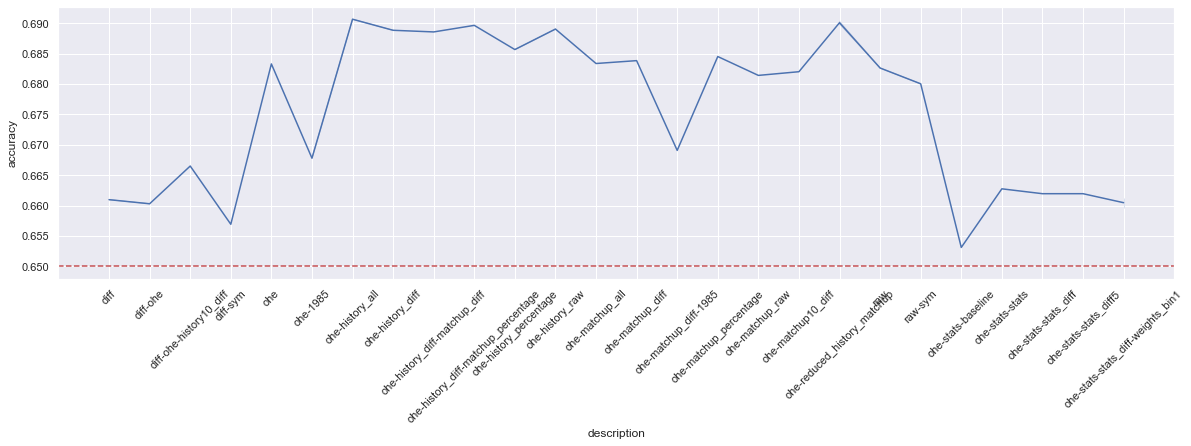

In [31]:
best_model = report.loc[report[report.description == DESCRIPTION].accuracy.idxmax()].model_name
print(f'Best Model: {best_model}')

dt_report = report[(report.model_name == best_model)]

f, a = plt.subplots(1, 1, figsize=(20, 5))
_ = sns.lineplot(x="description", y="accuracy", data=dt_report, ax=a, sort=False)
_ = a.axhline(0.65, ls='--', color='r')
_ = a.set_label(f"{best_model} Accuracy")
_ = plt.xticks(rotation=45)


In [32]:
current_report = report[(report.model_name == 'GradientBoostingClassifier') &
                                  (report.description == DESCRIPTION)]
mw = ModelWrapper.get_model_wrapper_from_report(current_report)


In [33]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(mw.model, data=X_train.values)
shap_values = explainer.shap_values(X_test.values)

NameError: name 'X_train' is not defined

In [34]:
shap.summary_plot(shap_values, X_test, max_display=30)

NameError: name 'shap_values' is not defined

In [35]:
shap.summary_plot(shap_values, feature_names=X_test.columns, title="Feature Importance")

NameError: name 'shap_values' is not defined

In [36]:
print(f'Last Finished: {datetime.now().strftime("%Y-%m-%d %H:%M")}')

Last Finished: 2019-10-26 12:35
